In [ ]:
Stacked Charts

Objectives

Visualize the composition of data using stacked charts.

Compare multiple variables across different categories using stacked charts.

Analyze trends within stacked chart visualizations.

In [1]:
!pip install pandas
!pip install matplotlib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)


In [5]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups
1. Stacked Chart of Median JobSatPoints_6 and JobSatPoints_7 for Different Age Groups
Visualize the composition of job satisfaction scores (JobSatPoints_6 and JobSatPoints_7) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.

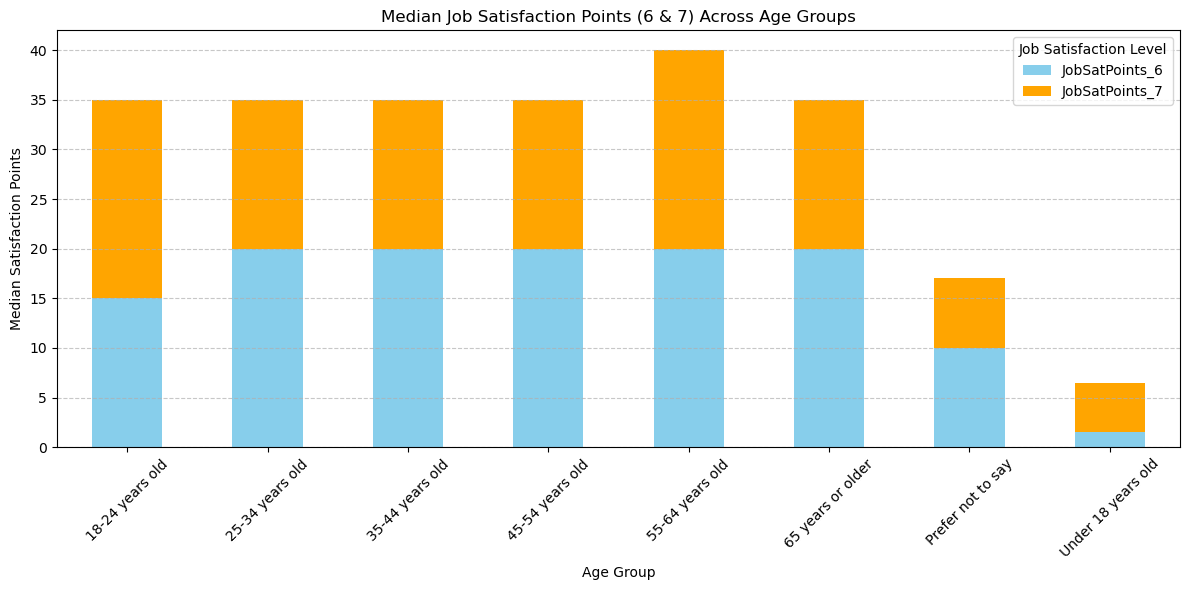

In [6]:
# Select relevant columns and drop rows with missing values in satisfaction columns
subset = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by Age and calculate median
grouped = subset.groupby('Age').median()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['skyblue', 'orange'])

# Chart formatting
plt.title('Median Job Satisfaction Points (6 & 7) Across Age Groups')
plt.ylabel('Median Satisfaction Points')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Level')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
Stacked Chart of JobSatPoints_6 and JobSatPoints_7 for Employment Status
Create a stacked chart to compare job satisfaction (JobSatPoints_6 and JobSatPoints_7) across different employment statuses. This will show how satisfaction varies by employment type.

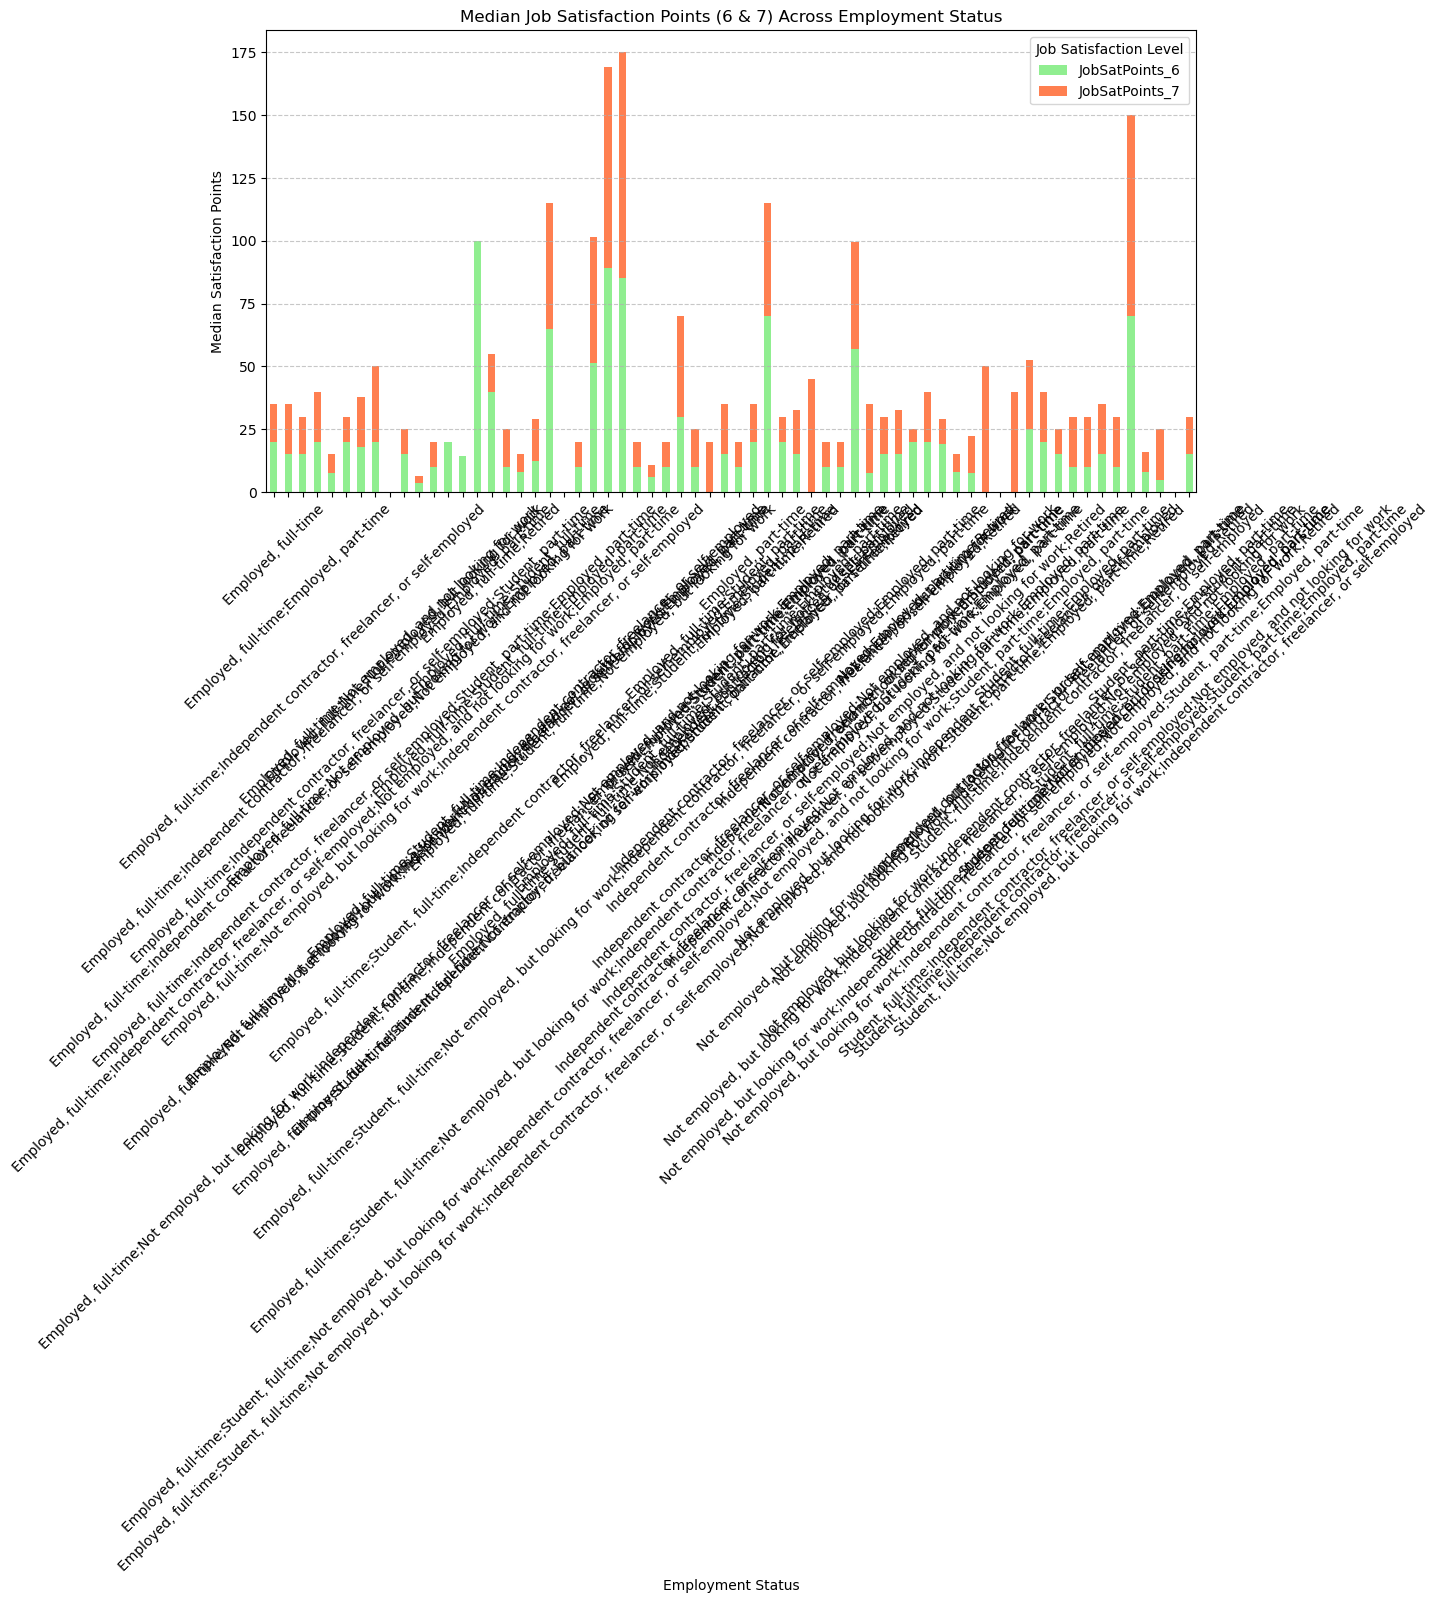

In [8]:
# Select relevant columns and drop rows with missing satisfaction values
subset = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Group by Employment and calculate median satisfaction points
grouped = subset.groupby('Employment').median()

# Plot stacked bar chart
grouped.plot(kind='bar', stacked=True, figsize=(12, 6), color=['lightgreen', 'coral'])

# Chart formatting
plt.title('Median Job Satisfaction Points (6 & 7) Across Employment Status')
plt.ylabel('Median Satisfaction Points')
plt.xlabel('Employment Status')
plt.xticks(rotation=45)
plt.legend(['JobSatPoints_6', 'JobSatPoints_7'], title='Job Satisfaction Level')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

In [ ]:
Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group
This stacked chart visualizes the composition of compensation (ConvertedCompYearly) and job satisfaction (JobSatPoints_6) specifically for respondents aged 30-35.

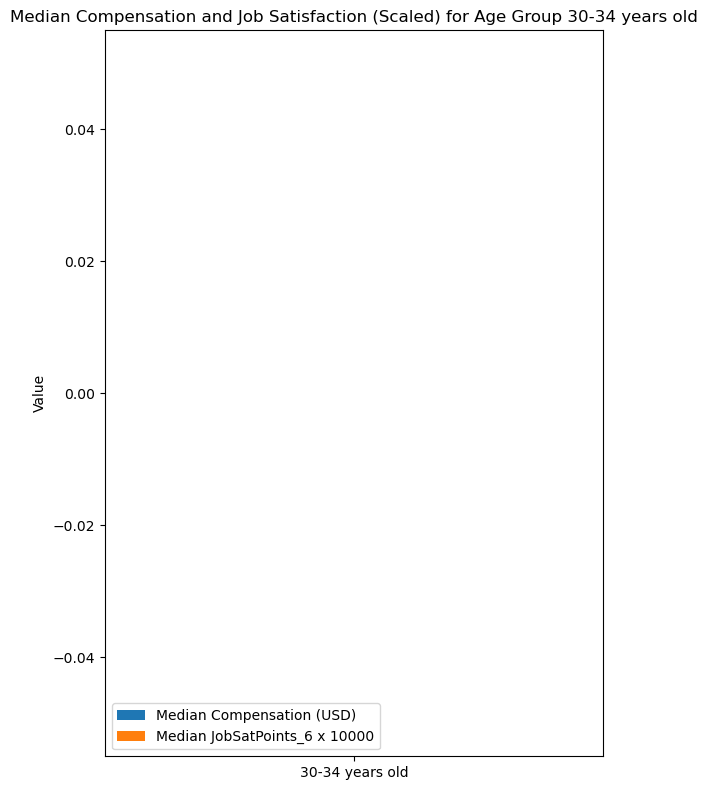

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Filter for age group '30-34 years old'
age_group = "30-34 years old"
df_age = df[df['Age'] == age_group]

# Drop rows with missing values in the two columns
df_filtered = df_age[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Calculate median of both columns
median_values = df_filtered.median()

# For stacking, let's scale JobSatPoints_6 to comparable scale with compensation (optional)
# Example: Normalize JobSatPoints_6 by multiplying by a factor (like 10,000)
scale_factor = 10000
job_sat_scaled = median_values['JobSatPoints_6'] * scale_factor

# Create a stacked bar chart with two bars (compensation and scaled job satisfaction)
plt.figure(figsize=(6, 8))

plt.bar(age_group, median_values['ConvertedCompYearly'], label='Median Compensation (USD)')
plt.bar(age_group, job_sat_scaled, bottom=median_values['ConvertedCompYearly'], label=f'Median JobSatPoints_6 x {scale_factor}')

plt.title(f'Median Compensation and Job Satisfaction (Scaled) for Age Group {age_group}')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
Stacked Chart of Median Compensation and Job Satisfaction Across Age Group
Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.

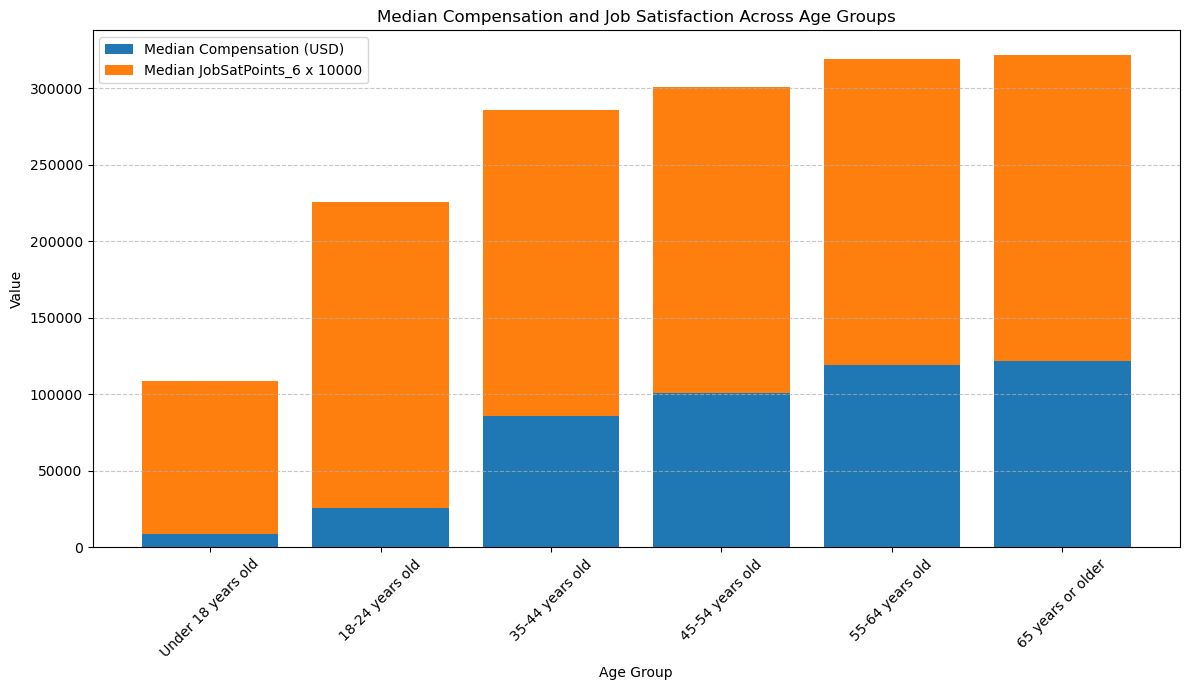

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Select relevant columns and drop rows with missing values
subset = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Group by Age and calculate median
grouped = subset.groupby('Age').median()

# Sort by Age groups logically (optional)
age_order = [
    'Under 18 years old', '18-24 years old', '25-29 years old',
    '30-34 years old', '35-44 years old', '45-54 years old',
    '55-64 years old', '65 years or older'
]
grouped = grouped.reindex(age_order).dropna()

# Normalize JobSatPoints_6 for visualization by multiplying by a factor
scale_factor = 10000
grouped['JobSatPoints_6_scaled'] = grouped['JobSatPoints_6'] * scale_factor

# Plot stacked bar chart
plt.figure(figsize=(12, 7))
plt.bar(grouped.index, grouped['ConvertedCompYearly'], label='Median Compensation (USD)')
plt.bar(grouped.index, grouped['JobSatPoints_6_scaled'], bottom=grouped['ConvertedCompYearly'],
        label=f'Median JobSatPoints_6 x {scale_factor}')

plt.title('Median Compensation and Job Satisfaction Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
Task 3: Comparing Data Using Stacked Charts
1. Stacked Chart of Preferred Databases by Age Group
Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.

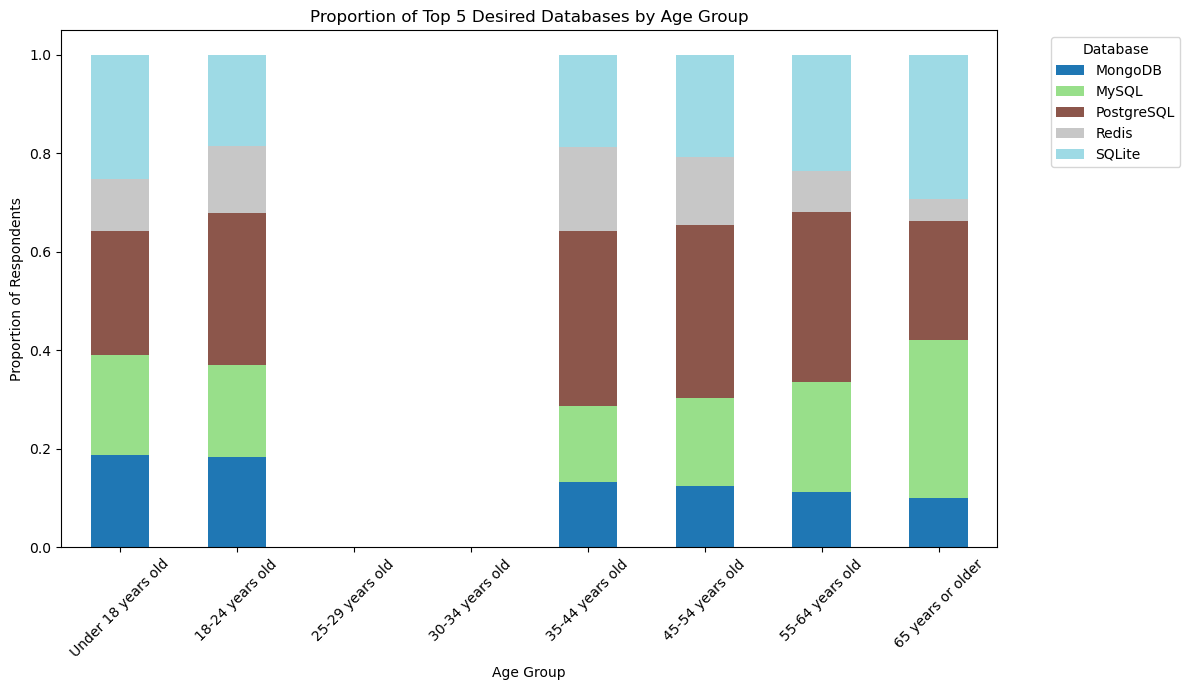

In [15]:
# Use the correct column name for desired databases
df_db = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# Split multiple databases into separate rows
df_db = df_db.assign(Database=df_db['DatabaseWantToWorkWith'].str.split(';')).explode('Database')

# Strip whitespace from database names
df_db['Database'] = df_db['Database'].str.strip()

# Count total occurrences per database to find top 5
top_dbs = df_db['Database'].value_counts().nlargest(5).index.tolist()

# Filter only top 5 databases
df_top = df_db[df_db['Database'].isin(top_dbs)]

# Group by Age and Database, count the number of respondents
counts = df_top.groupby(['Age', 'Database']).size().unstack(fill_value=0)

# Calculate proportions per Age group (divide by row sums)
props = counts.div(counts.sum(axis=1), axis=0)

# Sort Age groups logically if needed
age_order = [
    'Under 18 years old', '18-24 years old', '25-29 years old',
    '30-34 years old', '35-44 years old', '45-54 years old',
    '55-64 years old', '65 years or older'
]
props = props.reindex(age_order).fillna(0)

# Plot stacked bar chart
props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Proportion of Top 5 Desired Databases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
2. Stacked Chart of Employment Type by Job Satisfaction
Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.

In [13]:
# List all columns that contain the word 'Database' (case-insensitive)
database_cols = [col for col in df.columns if 'database' in col.lower()]
print(database_cols)


['DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired']


In [17]:
print(df['JobSat'].dropna().unique())



[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]


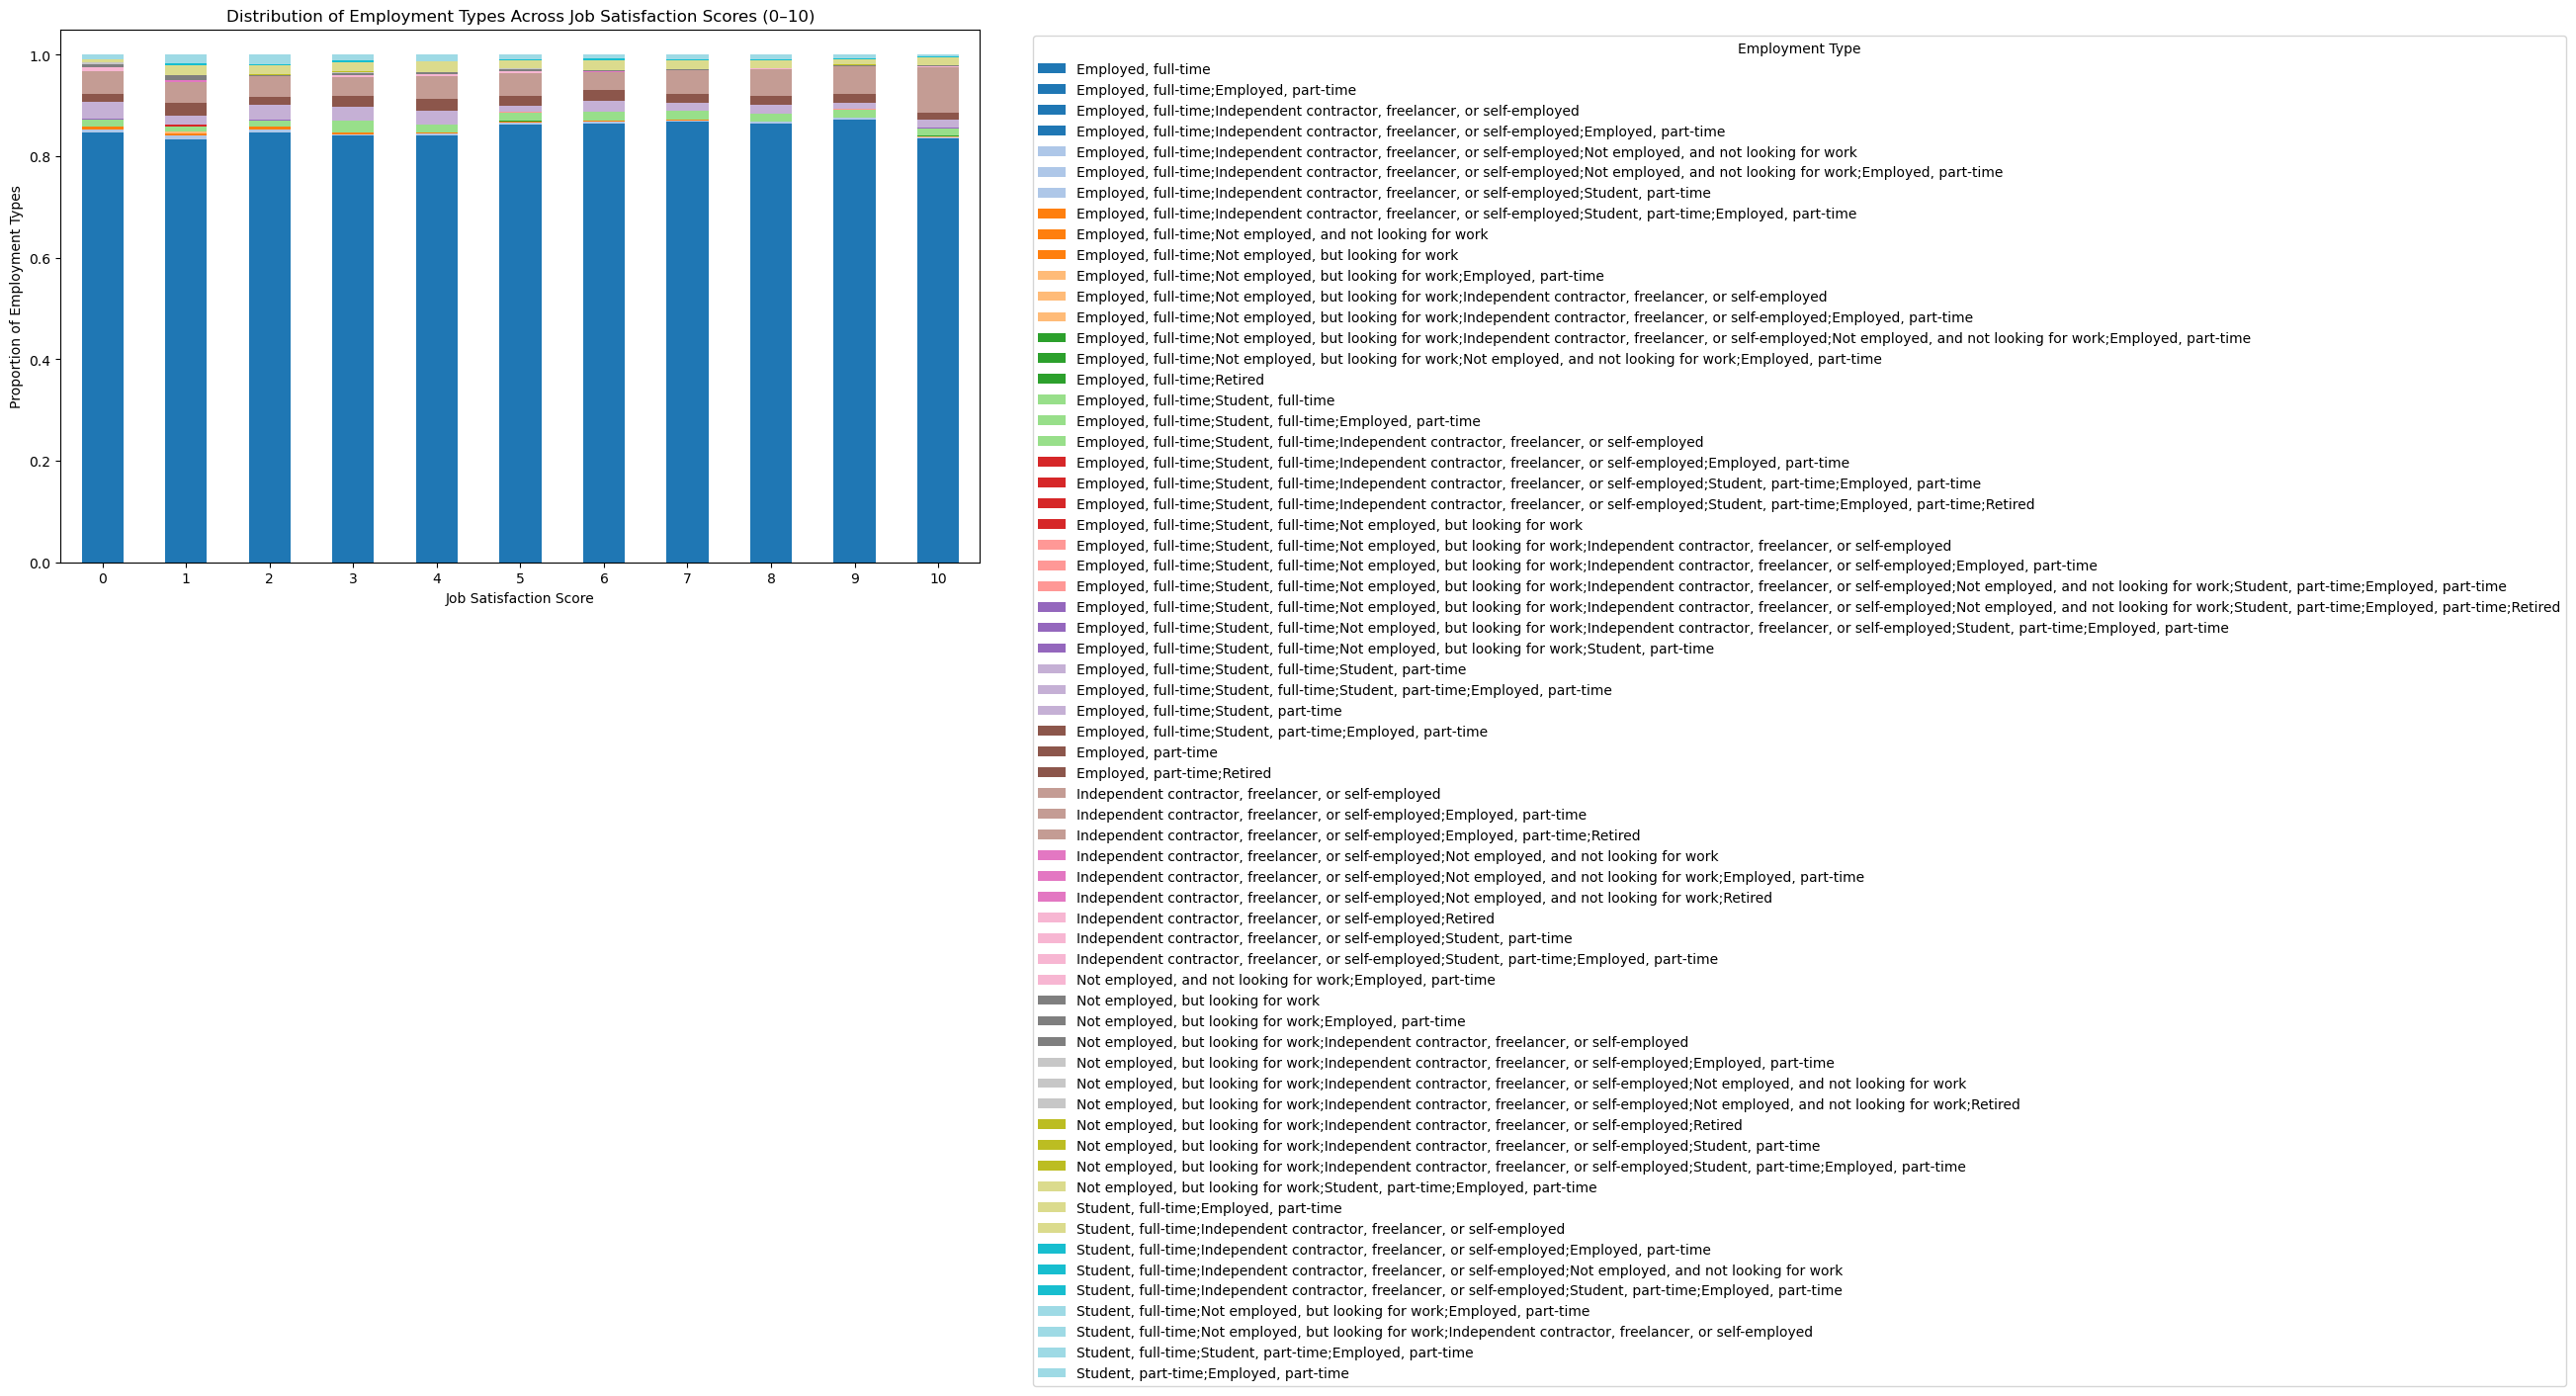

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Ensure JobSat is treated as numeric (if not already)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Drop rows with missing values in JobSat or Employment
df_filtered = df[['JobSat', 'Employment']].dropna()

# Round or cast JobSat to integer if needed (optional, since they're already integers)
df_filtered['JobSat'] = df_filtered['JobSat'].astype(int)

# Group and count employment types by JobSat score
counts = df_filtered.groupby(['JobSat', 'Employment']).size().unstack(fill_value=0)

# Normalize to proportions
props = counts.div(counts.sum(axis=1), axis=0)

# Sort JobSat levels numerically
props = props.sort_index()

# Plot
props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Distribution of Employment Types Across Job Satisfaction Scores (0–10)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Proportion of Employment Types')
plt.xticks(rotation=0)
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()



In [ ]:
Task 4: Exploring Technology Preferences Using Stacked Charts
1. Stacked Chart for Preferred Programming Languages by Age Group
Analyze how programming language preferences (LanguageAdmired) vary across age groups.

['LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired']


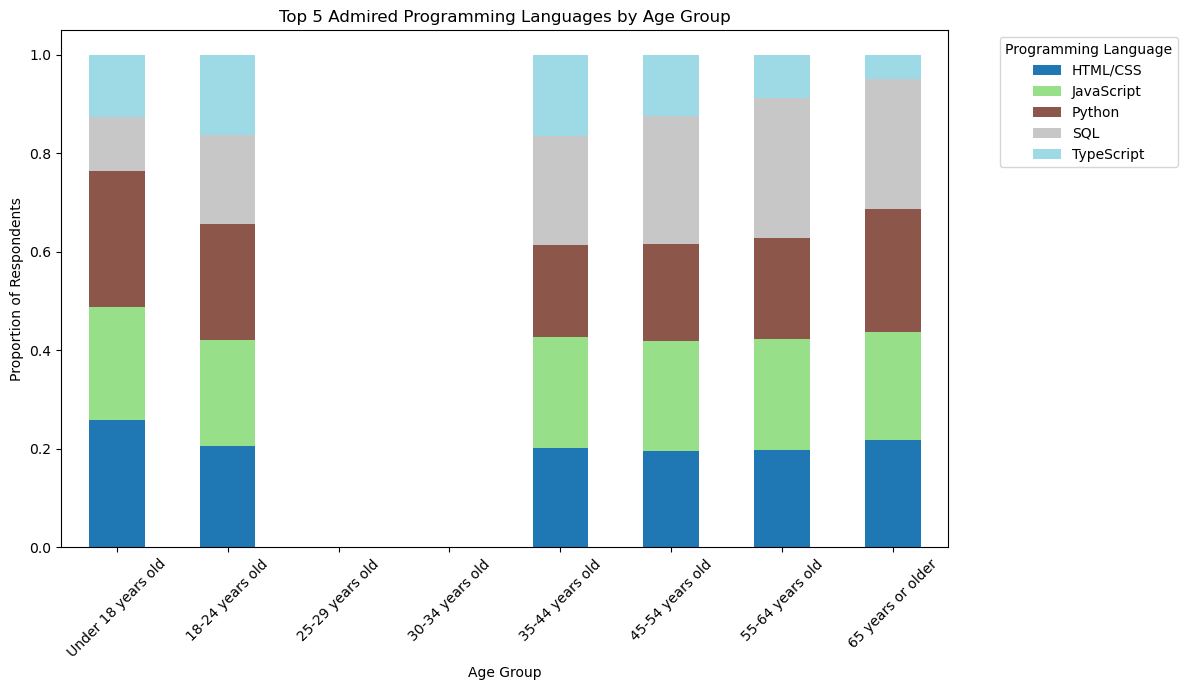

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Check column name
print([col for col in df.columns if 'language' in col.lower()])  # Confirm LanguageAdmired exists

# Filter relevant columns and drop NaNs
df_lang = df[['Age', 'LanguageAdmired']].dropna()

# Explode the semicolon-separated list into individual rows
df_lang = df_lang.assign(Language=df_lang['LanguageAdmired'].str.split(';')).explode('Language')
df_lang['Language'] = df_lang['Language'].str.strip()

# Get top 5 most admired languages
top_languages = df_lang['Language'].value_counts().nlargest(5).index.tolist()

# Filter only top 5
df_top = df_lang[df_lang['Language'].isin(top_languages)]

# Count per age group and language
counts = df_top.groupby(['Age', 'Language']).size().unstack(fill_value=0)

# Convert counts to proportions within each age group
props = counts.div(counts.sum(axis=1), axis=0)

# Optional: sort age groups logically
age_order = [
    'Under 18 years old', '18-24 years old', '25-29 years old',
    '30-34 years old', '35-44 years old', '45-54 years old',
    '55-64 years old', '65 years or older'
]
props = props.reindex(age_order).fillna(0)

# Plot
props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Top 5 Admired Programming Languages by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Programming Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
. Stacked Chart for Technology Adoption by Employment Type
Explore how admired platforms (PlatformAdmired) differ across employment types (e.g., full-time, freelance)

['PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired']


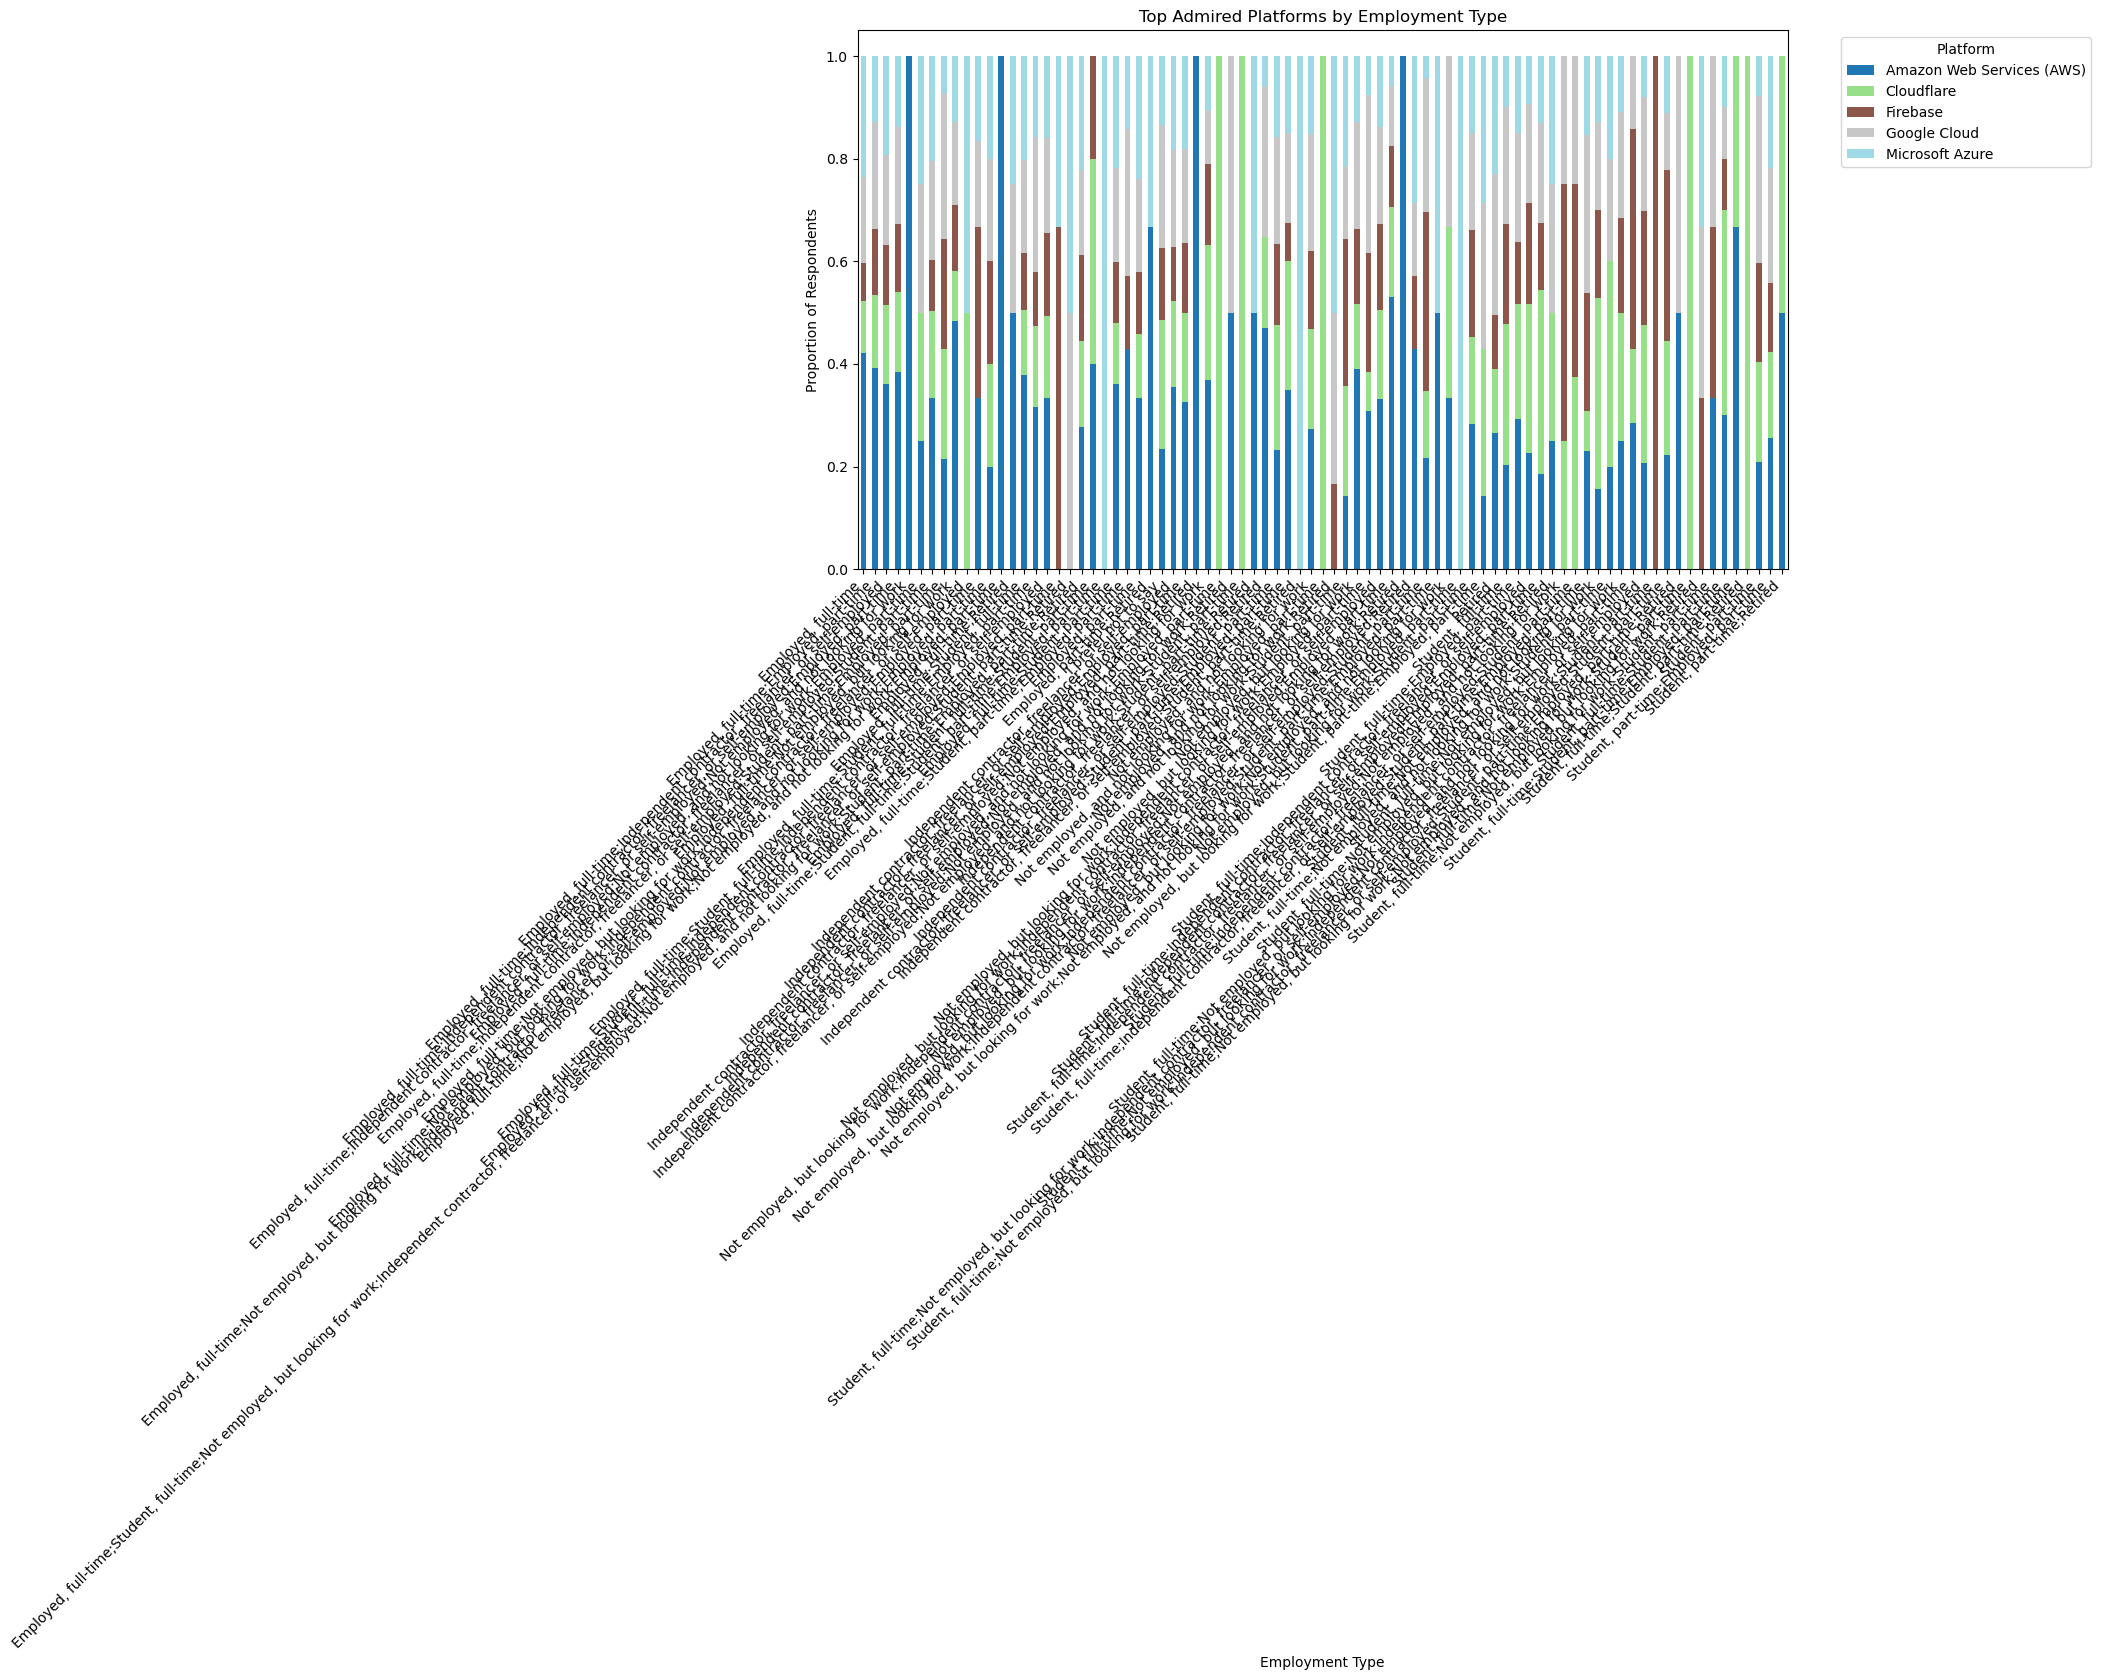

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(url)

# Check relevant columns
print([col for col in df.columns if 'platform' in col.lower()])

# Use 'PlatformAdmired' and 'Employment'
df_platform = df[['Employment', 'PlatformAdmired']].dropna()

# Split multiple platforms into separate rows
df_platform = df_platform.assign(Platform=df_platform['PlatformAdmired'].str.split(';')).explode('Platform')
df_platform['Platform'] = df_platform['Platform'].str.strip()

# Get top 5 most admired platforms
top_platforms = df_platform['Platform'].value_counts().nlargest(5).index.tolist()

# Filter for only those platforms
df_top = df_platform[df_platform['Platform'].isin(top_platforms)]

# Group by Employment and Platform
counts = df_top.groupby(['Employment', 'Platform']).size().unstack(fill_value=0)

# Normalize within Employment to get proportions
props = counts.div(counts.sum(axis=1), axis=0)

# Optional: sort Employment types by frequency or alphabetically
props = props.sort_index()

# Plot
props.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')

plt.title('Top Admired Platforms by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proportion of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
